## Notebook 1: Connecting Address and Weather Grid Points

This notebook is the pre-coding for generating the "dictionary" that connects each address coordinates in the city with its nearest weather grid point.

The reason for doing this ahead of time is that interpolation (even nearest neighbor!) takes time to run, while addresses in an established city such as Cambridge change slowly. 

The "dictionary" needs to be re-populated each time there's a new latitude/longitude set in the data, or each time there's a new 'Building ID' in Master_Address.

Required Python packages: pandas, numpy, and geopy



In [1]:
import pandas as pd
import numpy as np

# loading city addresses:
masterAddress = pd.read_csv('/Users/nbechor/Insight/SlipperySlope/data/external//Master_Addresses_List.csv')

In [2]:
masterAddress.keys()

Index(['Address ID', 'Full Address', 'Street Number', 'Street Name',
       'Building ID', 'MapLot', 'Latitude', 'Longitude', 'Type', 'Zip Code',
       'Neighborhood', 'Election Ward', 'Election Precinct',
       'Election Polling Address', 'Representation District',
       'Senate District', 'CAD Reporting District', 'Police Sector',
       'Police Car Route', 'Police Walking Route', 'Police Neighborhood',
       'Police Business District', 'Census Tract 2010',
       'Census Block Group 2010', 'Census Block 2010', 'Census Block ID 2010',
       'Street Sweeping District'],
      dtype='object')

The columns that are relevant here are the 'Building ID', which we will use for identifying buildings later on, and coordinates: 'Latitude', and 'Longitude'.



The code also relies on the class 'weatherClass', which includes the weather grid points:

In [3]:
# Reading the weather grid:
import sys
sys.path.insert(0, '/Users/nbechor/Insight/SlipperySlope/src/data')

from weatherData import weatherData

# weather_info includes the fields lats, lons, which are the weather data grid coordinates
# and their identifiers:
weather_info = weatherData()
    

In [4]:
identifierLocation = pd.DataFrame()

In [5]:
identifierLocation['Building ID'] = masterAddress['Building ID'].unique()

In [6]:
identifierLocation['lat'] = masterAddress['Latitude']
identifierLocation['lon'] = masterAddress['Longitude']
identifierLocation['identifier'] = np.zeros(identifierLocation.shape[0]).astype('int')


In [ ]:
N = len(weather_info.identifier)
def find_nearest_weather_point(latI,lonI):
    from geopy.distance import geodesic
    minDist = 4000
    for i in range(0,N):
        lat = weather_info.lats[i]
        lon = weather_info.lons[i]
        dist = geodesic([lat,lon],[latI,lonI]).meters
        if dist<minDist:
            minDist = dist
            nearestIdentifier = weather_info.identifier[i]
    return nearestIdentifier
            

Testing the code above for the first 10 buildings in the Master_Address.csv file:

In [ ]:
for i in range(0,10):
    identifierLocation['identifier'].iloc[i]= find_nearest_weather_point(identifierLocation['lat'].iloc[i],
                                                             identifierLocation['lon'].iloc[i])
    

Checking the output of the full run:

In [7]:
identifierLocation = pd.read_csv('/Users/nbechor/Insight/SlipperySlope/data/processed/BldgID2WeatherIdentifier.csv')


In [8]:
len(identifierLocation['identifier'].unique())

280

In other words, of the 945 grid points for weather, only 280 are going to actually be useful. The rest don't need to be updated. 

Final check: Plotting the locations:

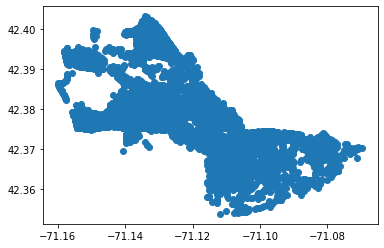

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt


plt.scatter(identifierLocation['lon'],identifierLocation['lat'])

The plot shows the locations of buildings that are included in the analysis. 

In [11]:
print('The number of buildings in Cambridge, according to city data:',len(masterAddress['Building ID'].unique()))
print('The number of buildings included in the analysis:',identifierLocation.shape[0])

The number of buildings in Cambridge, according to city data: 12518
The number of buildings included in the analysis: 12518


I now have a DataFrame with entries for each building in the city, its coordinates, and an identifier for the nearest weather grid point.

'All' that's left is to match is complaint, historic complaint, and ticket to each of these locations. This is done in Notebook #2.